In [142]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [32]:
df = pd.read_csv('..\\csv\\week3.csv')
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Trend,Ave,Upper,Lower
0,DHFL,EQ,426.65,429.50,434.40,427.05,431.00,431.40,430.94,1160661,5.001759e+08,15111,295581,25.47,0.000000,Slight or No change,NaN,NaN,NaN
1,DHFL,EQ,431.40,431.00,433.80,421.65,424.05,424.45,425.13,1662805,7.069152e+08,31644,681320,40.97,-1.611034,Negative,NaN,NaN,NaN
2,DHFL,EQ,424.45,424.50,432.50,420.10,428.30,429.00,428.13,1443843,6.181483e+08,20808,371928,25.76,1.071975,Positive,NaN,NaN,NaN
3,DHFL,EQ,429.00,424.95,427.90,416.55,418.50,417.95,422.22,1639654,6.923007e+08,32812,534358,32.59,-2.575758,Negative,NaN,NaN,NaN
4,DHFL,EQ,417.95,423.00,426.45,398.65,405.90,404.20,411.93,2693962,1.109716e+09,33554,884888,32.85,-3.289867,Among top losers,NaN,NaN,NaN


In [33]:
df.isnull().sum()[df.isnull().sum() > 0]

Ave      13
Upper    13
Lower    13
dtype: int64

In [34]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [35]:
s = '''
'Buy' if the stock price is below the lower Bollinger band 
'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
'Short' if the stock price is above the upper Bollinger band
''';

In [36]:
l = [i.split('if')[0][:-1][1:-1] for i in s.split('\n')][1:-1]
l

['Buy', 'Hold Buy/ Liquidate Short', 'Hold Short/ Liquidate Buy', 'Short']

In [37]:
df['Call'] = 0

In [38]:
df.loc[df['Average Price'] < df['Lower'], 'Call'] = l[0]

In [39]:
df.loc[(df['Average Price'] >= df['Lower']) & (df['Average Price'] <= df['Ave']), 'Call'] = l[1]

In [40]:
df.loc[(df['Average Price'] >= df['Ave']) & (df['Average Price'] <= df['Upper']), 'Call'] = l[2]

In [41]:
df.loc[df['Average Price'] > df['Upper'], 'Call'] = l[3]

In [42]:
df['Call'].value_counts()

Hold Short/ Liquidate Buy    242
Hold Buy/ Liquidate Short    207
Buy                           18
Short                         14
Name: Call, dtype: int64

In [45]:
X = df[['Average Price', 'Upper', 'Lower', 'Ave']]
y = df['Call']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
clf = RandomForestClassifier(n_estimators=200, max_depth=18, n_jobs=-1, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
y_pred = clf.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                      Buy       0.00      0.00      0.00         1
Hold Buy/ Liquidate Short       0.87      0.84      0.85        69
Hold Short/ Liquidate Buy       0.82      0.88      0.85        68
                    Short       0.50      0.14      0.22         7

                micro avg       0.82      0.82      0.82       145
                macro avg       0.55      0.47      0.48       145
             weighted avg       0.82      0.82      0.82       145



In [88]:
accuracy_score(y_test, y_pred)

0.8206896551724138

In [90]:
tcs = pd.read_csv('..\\stocks\\TCS.csv')
tcs['Date'] = pd.to_datetime(tcs['Date'], unit='ns')
tcs.index = tcs['Date'].dt.floor('d')
tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
2017-05-18,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
2017-05-19,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [95]:
def bbands(price, length=14, numsd=2):
    ave = price.rolling(length).mean()
    sd = price.rolling(length).std()
    
    uband = ave + sd * numsd
    lband = ave - sd * numsd
    
    return np.round(ave, 3), np.round(uband, 3), np.round(lband, 3)

tcs['Ave'], tcs['Upper'], tcs['Lower'] = bbands(tcs['Close Price'])
tcs.dropna(inplace=True)
tcs.reset_index(drop=True, inplace=True)

In [97]:
X = tcs[['Average Price', 'Upper', 'Lower', 'Ave']]

y_pred = clf.predict(X)
tcs['Call'] = y_pred

In [105]:
df = pd.read_csv('..\\stocks\\TCS.csv')
df['Date'] = pd.to_datetime(df['Date'], unit='ns')
df.index = df['Date'].dt.floor('d')
df['Day_Perc_Change'] = 100 * df['Close Price'].pct_change()
df.iloc[0, -1] = 0
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
Date,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,0.000000
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2.708131
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,1.078567
2017-05-18,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20,3.292810
2017-05-19,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94,-1.145414


In [106]:
s = '''
% change between Open and Close price for the day 
% change between Low and High price for the day 
5 day rolling mean of the day to day % change in Close Price 
5 day rolling std of the day to day % change in Close Price
''';

In [109]:
df['Open-Close'] = (df['Open Price'] - df['Close Price']) / df['Open Price']
df['High-Low']   = (df['High Price'] - df['Low Price']) / df['Low Price']
df['std_5']      = df['Day_Perc_Change'].rolling(5).std()
df['ret_5']      = df['Day_Perc_Change'].rolling(5).mean()

df.dropna(inplace=True)

In [110]:
df['Action'] = np.where(df['Close Price'].shift(-1) > df['Close Price'], 1, -1)

In [114]:
X = df[['Open-Close', 'High-Low', 'std_5', 'ret_5']]
y = df['Action']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
result = pd.concat([df['Close Price'], y], axis=1, join='inner')
result.head()

,Close Price,Action
Date,,
2017-05-19,2507.15,1
2017-05-22,2531.35,-1
2017-05-23,2521.70,1
2017-05-24,2559.15,1
2017-05-25,2624.60,-1


In [134]:
clf = RandomForestClassifier(n_estimators=200, max_depth=12, n_jobs=-1, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [135]:
y_pred = clf.predict(X_test)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.48      0.45      0.47        75
           1       0.47      0.50      0.49        74

   micro avg       0.48      0.48      0.48       149
   macro avg       0.48      0.48      0.48       149
weighted avg       0.48      0.48      0.48       149



In [137]:
accuracy_score(y_test, y_pred)

0.47651006711409394

In [138]:
df['Strategy_Returns'] = df['Day_Perc_Change'] * clf.predict(X)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change,Open-Close,High-Low,std_5,ret_5,Action,Strategy_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-19,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,...,63112,517461,57.94,-1.145414,0.011454,0.021943,1.844529,1.186818,1,1.145414
2017-05-22,TCS,EQ,2017-05-22,2507.15,2510.0,2553.75,2510.00,2535.00,2531.35,2530.69,...,53261,509741,61.27,0.965239,-0.008506,0.017430,1.736619,1.379866,-1,-0.965239
2017-05-23,TCS,EQ,2017-05-23,2531.35,2533.2,2564.15,2514.00,2523.70,2521.70,2530.49,...,88749,995551,72.44,-0.381220,0.004540,0.019948,1.694970,0.761996,1,0.381220
2017-05-24,TCS,EQ,2017-05-24,2521.70,2534.8,2570.00,2529.65,2567.10,2559.15,2545.01,...,58716,918505,72.48,1.485109,-0.009606,0.015951,1.723464,0.843305,1,1.485109
2017-05-25,TCS,EQ,2017-05-25,2559.15,2577.0,2637.55,2568.00,2615.05,2624.60,2605.40,...,87147,1180439,57.67,2.557490,-0.018471,0.027083,1.475766,0.696241,-1,-2.557490


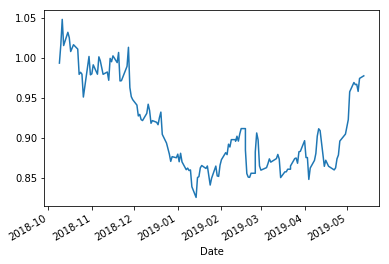

In [143]:
((df['Strategy_Returns'][y_train.size:] + 100) / 100).cumprod().plot()